In [1]:
import numpy as np
from scipy.stats import norm, chi2_contingency
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator


In [2]:
p = 0.5
delta_list = np.arange(0, 0.3+1e-3, 0.05)
n = 10
mult_list = np.arange(0, 5, 0.1)

In [3]:
def calculate_confidence(p,q,n,m):
    avgp = (n*p+m*q)/(n+m)
    z = (p-q)/np.sqrt(avgp*(1-avgp)*(1/n + 1/m))
    return norm.cdf(z)

In [4]:
delta_col = []
for delta in delta_list:
    
    m_col = []
    for mult in mult_list:
        res = calculate_confidence(p, p+delta, n, 0.0001 if n*mult == 0 else n*mult)
        m_col.append(res)
    delta_col.append(m_col)
delta_col = np.array(delta_col)

Text(0.5, 1.0, '$p = 0.5, q = p + \\Delta$')

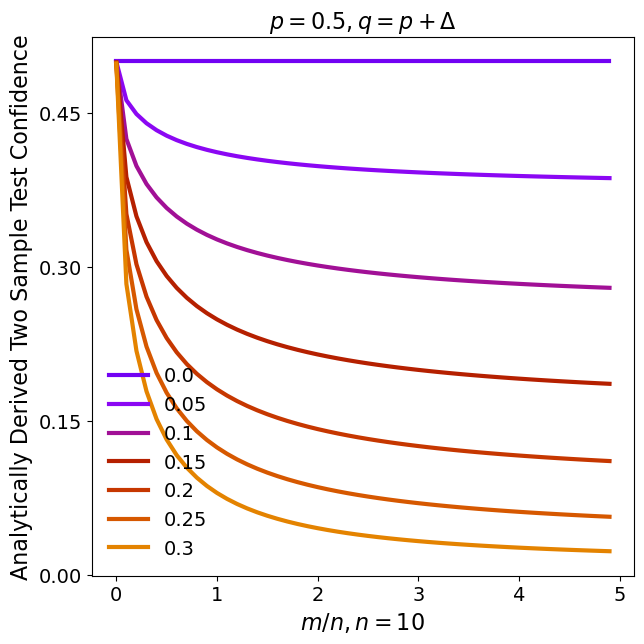

In [5]:
fontsize = 16
labelsize = 14
fig, ax = plt.subplots(figsize=(7, 7))
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.2, 0.8, len(delta_list))]
for i, delta in enumerate(delta_list):
    ax.plot(mult_list, delta_col[i], c=cmap[i], lw=3, label=str(np.round(delta, 2)))
ax.set_ylabel("Analytically Derived Two Sample Test Confidence", fontsize=fontsize)
ax.set_xlabel(r"$m/n, n=10$", fontsize=fontsize)
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
ax.legend(fontsize=labelsize, frameon=False)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_title(r"$p = {}, q = p + \Delta$".format(p), fontsize=fontsize)

In [8]:
def calculate_chi(p,q,n,m):
    expected_ones = (n+m)*p
    expected_zeros = (n+m)*(1-p)
    observed_ones = n*p+m*q
    observed_zeros = n*(1-p) + m*(1-q)
    table = [[observed_ones, observed_zeros],[expected_ones, expected_zeros]]
    stat, confi, dof, freq = chi2_contingency(table) 
    return confi

In [9]:
delta_col2 = []
for delta in delta_list:
    p_col = []
    for mult in mult_list:
        res = calculate_chi(p, p+delta, n, n*mult)
        p_col.append(res)
    delta_col2.append(p_col)
delta_col2 = np.array(delta_col2)

Text(0.5, 1.0, '$p = 0.5, q = p + \\Delta$')

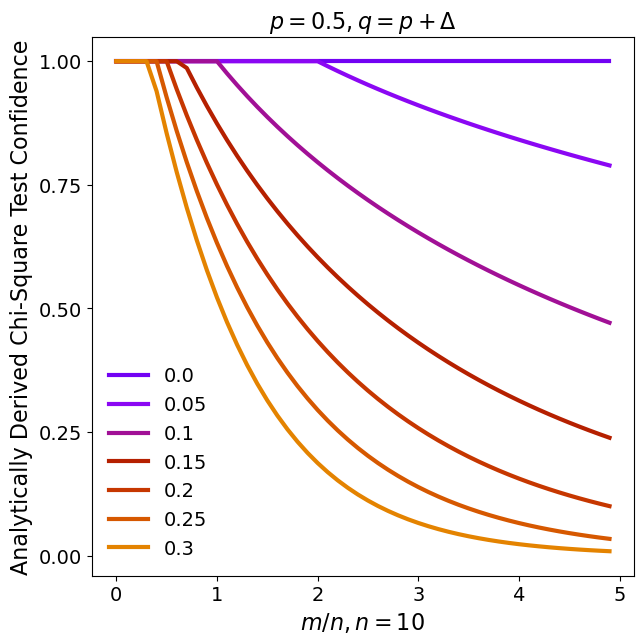

In [10]:
fontsize = 16
labelsize = 14
fig, ax = plt.subplots(figsize=(7, 7))
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.2, 0.8, len(delta_list))]
for i, delta in enumerate(delta_list):
    ax.plot(mult_list, delta_col2[i], c=cmap[i], lw=3, label=str(np.round(delta, 2)))
ax.set_ylabel("Analytically Derived Chi-Square Test Confidence", fontsize=fontsize)
ax.set_xlabel(r"$m/n, n=10$", fontsize=fontsize)
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
ax.legend(fontsize=labelsize, frameon=False)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_title(r"$p = {}, q = p + \Delta$".format(p), fontsize=fontsize)